In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/consumer_complaints.csv')

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,09-12-2024,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,91752,NaN,Consent not provided,Web,09-12-2024,Closed with non-monetary relief,Yes,NaN,10084178.0
1,04/18/22,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,35810,NaN,Consent not provided,Web,04/18/22,Closed with non-monetary relief,Yes,NaN,5458976.0
2,11-02-2023,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,The purpose of this complaint is to have sever...,NaN,"EQUIFAX, INC.",FL,33165,NaN,Consent provided,Web,11-02-2023,Closed with explanation,Yes,NaN,7789123.0
3,07/19/23,Debt collection,Credit card debt,False statements or representation,Attempted to collect wrong amount,Previously disputed account with XXXX asking t...,NaN,Resurgent Capital Services L.P.,IA,501XX,NaN,Consent provided,Web,07/19/23,Closed with explanation,Yes,NaN,7274724.0
4,07-07-2023,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",NY,11207,NaN,Consent not provided,Web,07-07-2023,Closed with explanation,Yes,NaN,7220093.0


In [4]:
df.isnull().sum()

Date received                        1
Product                              1
Sub-product                         14
Issue                                2
Sub-issue                        22891
Consumer complaint narrative    489461
Company public response         332342
Company                              1
State                             2587
ZIP code                           320
Tags                            768895
Consumer consent provided?       24356
Submitted via                        1
Date sent to company                 1
Company response to consumer         9
Timely response?                     1
Consumer disputed?              815700
Complaint ID                         1
dtype: int64

In [5]:
df = df[df['Product'].notna()]
df = df[df['Consumer complaint narrative'].notna()]

In [6]:
df = df[['Consumer complaint narrative', 'Product']]
df = df.rename(columns={'Consumer complaint narrative': 'text', 'Product': 'label'})

In [7]:
df['text'].iloc[0:3].values

array(['The purpose of this complaint is to have several unauthorized hard credit inquiries removed from my credit report. I received a copy of my credit report from your bureau on XX/XX/XXXX and noticed that there are unauthorized inquiries listed. Kindly investigate my claim in accordance with the Fair Credit Reporting Act. If you find any unauthorized inquiries, PLEASE REMOVE THEM AS QUICKLY AS POSSIBLE and send me a copy of my new, accurate credit report. \nXXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX',
       'Previously disputed account with XXXX asking to verify or delete because I do not recall having this debt. Account reported only by XXXX and stated as Closed account payment status of collection charge off with a credit limit of {$250.00} and last payment done XX/XX/19. Reporting account purchase by another lender. I hav not received any document stating my signature making me resp

In [8]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def clean_text(text: str) -> str:
    """
    Clean and preprocess text data.
    
    Args:
        text: Input text string.
        
    Returns:
        Cleaned text string.
    """
    try:
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Convert to lowercase
        text = text.lower()
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        stop_words.update(['xxxx', '--', 'xx'])
        stop_words.update(string.punctuation)
        stop_words.update(['"', "'", '(', ')', '[', ']', '{', '}', '...', '``', "''"])
    
        tokens = [word for word in tokens if word not in stop_words]
        
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error cleaning text: {e}")


df['text'] = df['text'].apply(clean_text)

In [29]:
df.label.value_counts()

label
credit_reporting                                           235441
debt_collection                                             29178
retail_banking                                              21693
mortgages_and_loans                                         17740
Credit card                                                 10594
credit_card                                                  8754
Payday loan, title loan, personal loan, or advance loan      1379
Prepaid card                                                 1056
Debt or credit management                                     404
Name: count, dtype: int64

In [11]:
def label_encoding(df):
    """
    Merge into common categories.
    
    Args:
        labels: List of string labels.
        
    Returns:
        List of str-encoded labels.
    """
    df['label'].replace({'Credit reporting, credit repair services, or other personal consumer reports': 'credit_reporting',
                       'Debt collection': 'debt_collection',
                       'Credit reporting or other personal consumer reports': 'credit_reporting',
                       'Credit card or prepaid card': 'credit_card',
                       'Mortgage': 'mortgages_and_loans',
                       'Payday loan, title loan, personal loan, or advance loan': 'mortgages_and_loans',
                       'Checking or savings account': 'retail_banking',
                       'Money transfer, virtual currency, or money service': 'retail_banking',
                       'Vehicle loan or lease': 'mortgages_and_loans',
                       'Payday loan, title loan, or personal loan': 'mortgages_and_loans',
                       'Student loan': 'mortgages_and_loans'}, inplace=True)
    return df

df = label_encoding(df)

C:\Users\prajw\AppData\Local\Temp\ipykernel_23540\3808144145.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace({'Credit reporting, credit repair services, or other personal consumer reports': 'credit_reporting',


In [16]:
from nltk.tokenize import word_tokenize
temp = 0
for i in range(len(df)):
    size = len(word_tokenize(df['text'].iloc[i]))
    if size > temp:
        temp = size
        print(f"Max length of text updated: {temp} at index {i}")

print(f"Max length of text: {temp}")



Max length of text updated: 41 at index 0
Max length of text updated: 85 at index 1
Max length of text updated: 144 at index 3
Max length of text updated: 224 at index 9
Max length of text updated: 305 at index 45
Max length of text updated: 1753 at index 83
Max length of text updated: 1776 at index 621
Max length of text updated: 2774 at index 1214
Max length of text updated: 2885 at index 17769
Max length of text updated: 2992 at index 50084
Max length of text updated: 2999 at index 213882
Max length of text: 2999


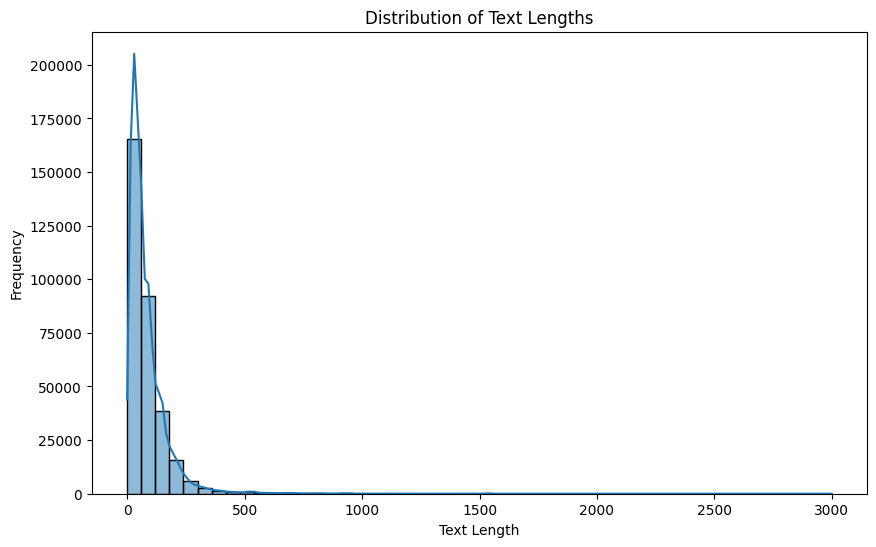

In [20]:
plt.figure(figsize=(10, 6))
df['text_len'] = df['text'].apply(lambda x: len(word_tokenize(x)))
sns.histplot(df['text_len'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [21]:
df.shape

(326239, 3)